<h2>LSTM</h2>

In [1]:
import nltk
import json
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Embedding
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Load intents
data_file = open('intents.json').read()
intents = json.loads(data_file)

# Extract text and labels from intents
texts = []
labels = []

for intent in intents['intents']:
    for pattern in intent['patterns']:
        texts.append(pattern)
        labels.append(intent['tag'])

# Tokenize the text data
max_words = 1000
tokenizer = Tokenizer(num_words=max_words, lower=True, split=" ")
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index

# Pad sequences
max_sequence_length = max([len(seq) for seq in sequences])
data = pad_sequences(sequences, maxlen=max_sequence_length)

# Load testing intents
data_file_test = open('intents_testing.json').read()
intents_test = json.loads(data_file_test)

# Extract text and labels from testing intents
texts_test = []
labels_test = []

for intent in intents_test['intents']:
    for pattern in intent['patterns']:
        texts_test.append(pattern)
        labels_test.append(intent['tag'])

# Tokenize and pad the testing text data
sequences_test = tokenizer.texts_to_sequences(texts_test)
data_test = pad_sequences(sequences_test, maxlen=max_sequence_length)



2023-04-26 23:36:14.011239: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 23:36:14.087127: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-04-26 23:36:14.088484: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-26 23:36:15.558148: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:

# Encode testing labels

# Encode labels
le = LabelEncoder()
encoded_labels = le.fit_transform(labels)
num_classes = len(le.classes_)
encoded_labels_test = le.transform(labels_test)

# Define the LSTM model
model = Sequential()
model.add(Embedding(max_words, 128, input_length=max_sequence_length))
model.add(LSTM(128, return_sequences=True, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(LSTM(64, kernel_regularizer=l2(0.001)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax', kernel_regularizer=l2(0.001)))

# Compile the model
optimizer = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# hist=model.fit(data, encoded_labels, epochs=100, batch_size=8, verbose=1)
hist = model.fit(data, encoded_labels, validation_data=(data_test, encoded_labels_test), epochs=100, batch_size=8, verbose=1)



2023-04-26 23:37:51.588854: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 23:37:51.591739: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 23:37:51.594928: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/100


2023-04-26 23:37:51.966262: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 23:37:51.969971: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 23:37:51.973237: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

109/109 [==============================] - ETA: 0s - loss: 3.8476 - accuracy: 0.0722

2023-04-26 23:38:00.899568: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-26 23:38:00.903721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-26 23:38:00.905573: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

109/109 [==============================] - 10s 53ms/step - loss: 3.8476 - accuracy: 0.0722 - val_loss: 3.8694 - val_accuracy: 0.0263
Epoch 2/100
109/109 [==============================] - 4s 40ms/step - loss: 3.5864 - accuracy: 0.1055 - val_loss: 3.7339 - val_accuracy: 0.0395
Epoch 3/100
109/109 [==============================] - 4s 41ms/step - loss: 3.3435 - accuracy: 0.1158 - val_loss: 3.6626 - val_accuracy: 0.0789
Epoch 4/100
109/109 [==============================] - 4s 41ms/step - loss: 3.1872 - accuracy: 0.1548 - val_loss: 3.5346 - val_accuracy: 0.0658
Epoch 5/100
109/109 [==============================] - 4s 40ms/step - loss: 3.0115 - accuracy: 0.2030 - val_loss: 3.4317 - val_accuracy: 0.0921
Epoch 6/100
109/109 [==============================] - 5s 42ms/step - loss: 2.8336 - accuracy: 0.2557 - val_loss: 3.3654 - val_accuracy: 0.1053
Epoch 7/100
109/109 [==============================] - 5s 41ms/step - loss: 2.6522 - accuracy: 0.2970 - val_loss: 3.2847 - val_accuracy: 0.1579
Epo

In [ ]:
# Evaluate the model on the training set
train_loss, train_acc = model.evaluate(data, encoded_labels, verbose=0)
print('Train accuracy:', train_acc)

# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(data_test, encoded_labels_test, verbose=0)
print('Test accuracy:', test_acc)

Train accuracy: 0.9529816508293152
Test accuracy: 0.6184210777282715


In [ ]:
from sklearn.metrics import classification_report

# Make predictions on the training and testing set
y_train_pred = model.predict(data)
y_test_pred = model.predict(data_test)

# Convert predicted probabilities to binary predictions
y_train_pred_binary = np.argmax(y_train_pred, axis=1)
y_test_pred_binary = np.argmax(y_test_pred, axis=1)




3/3 [==============================] - 0s 24ms/step


In [ ]:
# Print classification report for training set
print('Training Set Metrics:')
print(classification_report(encoded_labels, y_train_pred_binary))



Training Set Metrics:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        10
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        13
           5       1.00      1.00      1.00        13
           6       1.00      0.82      0.90        11
           7       1.00      1.00      1.00         9
           8       1.00      0.90      0.95        20
           9       1.00      0.64      0.78        11
          10       1.00      1.00      1.00         9
          11       0.90      0.95      0.92        19
          12       1.00      0.88      0.93        16
          13       1.00      0.91      0.95        11
          14       0.95      1.00      0.97        38
          15       0.92      1.00      0.96        24
          16       1.00      1.00      1.00        17
     

In [ ]:
# Print classification report for testing set
print('Testing Set Metrics:')
print(classification_report(encoded_labels_test, y_test_pred_binary))

Testing Set Metrics:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         2
           2       0.50      1.00      0.67         2
           3       0.50      1.00      0.67         2
           4       0.67      1.00      0.80         2
           5       1.00      1.00      1.00         2
           6       1.00      0.50      0.67         2
           7       0.00      0.00      0.00         1
           8       0.00      0.00      0.00         2
           9       0.50      0.50      0.50         2
          10       1.00      1.00      1.00         2
          11       0.00      0.00      0.00         2
          12       0.00      0.00      0.00         2
          13       0.67      1.00      0.80         2
          14       0.50      1.00      0.67         2
          15       1.00      0.50      0.67         2
          16       0.00      0.00      0.00         2
      

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


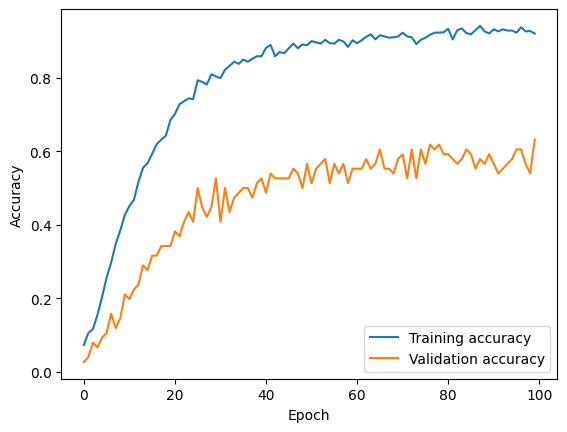

In [4]:
import matplotlib.pyplot as plt

# Plot the training and validation accuracy over time
plt.plot(hist.history['accuracy'], label='Training accuracy')
plt.plot(hist.history['val_accuracy'], label='Validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



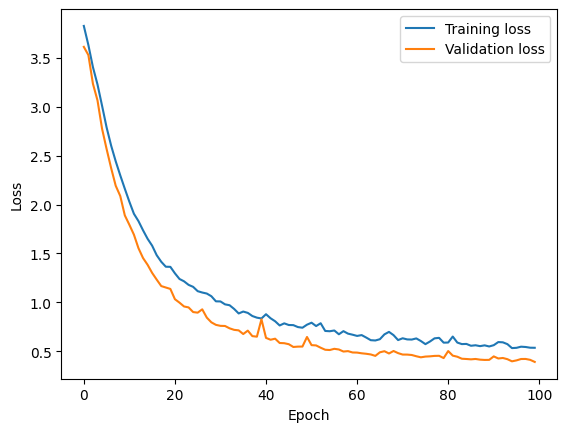

In [ ]:

# Plot the training and validation loss over time
plt.plot(hist.history['loss'], label='Training loss')
plt.plot(hist.history['val_loss'], label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

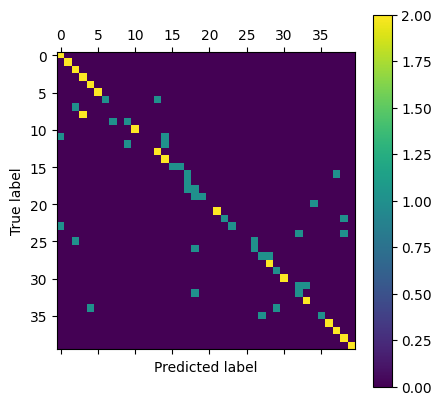

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(encoded_labels_test, y_test_pred_binary)

# Plot confusion matrix
plt.matshow(cm)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


In [ ]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score


class KerasModel(BaseEstimator, ClassifierMixin):
    def fit(self, X, y):
        model = keras.Sequential([
            layers.LSTM(64, input_shape=(X.shape[1], 1)),
            layers.Dense(128, kernel_regularizer=l2(0.001)),
            layers.Dropout(0.5),
            layers.Dense(1, activation="relu"),
            layers.Dense(64, kernel_regularizer=l2(0.001)),
            layers.Dropout(0.5),
            layers.Dense(1, activation="relu"), 
            ])
        model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
        model.fit(X, y, epochs=275, batch_size=7)
        self.model = model
        return self

    def score(self, X, y):
        return accuracy_score(y, (self.model.predict(X) > 0.5).flatten())


In [ ]:
if __name__ == "__main__":
    data, encoded_labels = make_classification()
    clf = KerasModel()
    print(cross_val_score(clf, data, encoded_labels))

Epoch 1/275
12/12 [==============================] - 3s 12ms/step - loss: 4.5272 - accuracy: 0.5000
Epoch 2/275
12/12 [==============================] - 0s 13ms/step - loss: 1.4579 - accuracy: 0.5000
Epoch 3/275
12/12 [==============================] - 0s 12ms/step - loss: 1.2980 - accuracy: 0.5000
Epoch 4/275
12/12 [==============================] - 0s 13ms/step - loss: 1.1746 - accuracy: 0.5000
Epoch 5/275
12/12 [==============================] - 0s 13ms/step - loss: 1.0904 - accuracy: 0.5000
Epoch 6/275
12/12 [==============================] - 0s 12ms/step - loss: 1.0489 - accuracy: 0.5000
Epoch 7/275
12/12 [==============================] - 0s 12ms/step - loss: 1.0011 - accuracy: 0.5000
Epoch 8/275
12/12 [==============================] - 0s 12ms/step - loss: 0.8743 - accuracy: 0.5375
Epoch 9/275
12/12 [==============================] - 0s 12ms/step - loss: 0.7664 - accuracy: 0.5750
Epoch 10/275
12/12 [==============================] - 0s 13ms/step - loss: 1.1901 - accuracy: 0.4875

1/1 [==============================] - 1s 651ms/step
Epoch 1/275
12/12 [==============================] - 3s 13ms/step - loss: 1.7921 - accuracy: 0.5000
Epoch 2/275
12/12 [==============================] - 0s 13ms/step - loss: 0.8851 - accuracy: 0.5125
Epoch 3/275
12/12 [==============================] - 0s 12ms/step - loss: 1.0040 - accuracy: 0.5125
Epoch 4/275
12/12 [==============================] - 0s 12ms/step - loss: 0.8041 - accuracy: 0.5125
Epoch 5/275
12/12 [==============================] - 0s 13ms/step - loss: 0.7629 - accuracy: 0.6125
Epoch 6/275
12/12 [==============================] - 0s 13ms/step - loss: 0.9029 - accuracy: 0.6500
Epoch 7/275
12/12 [==============================] - 0s 13ms/step - loss: 1.3317 - accuracy: 0.5875
Epoch 8/275
12/12 [==============================] - 0s 13ms/step - loss: 0.8095 - accuracy: 0.5500
Epoch 9/275
12/12 [==============================] - 0s 13ms/step - loss: 0.8128 - accuracy: 0.5500
Epoch 10/275
12/12 [===========================

1/1 [==============================] - 0s 459ms/step
[0.55 0.5  0.5  0.5  0.5 ]
